# Prediction using sipervised ML


### Author : Saloni Angre

## Prediction of the percentage score of a student based on the number of hours studied.

#### The task has two variables where the feature is the no. of hours studied and the target value is the percentage score. This can be solved using linear regression.

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading data from remote url

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [3]:
data=pd.read_csv(url)

#### Exploring data

In [4]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


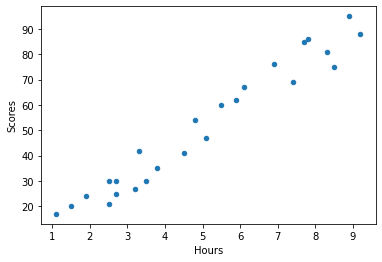

In [7]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

In [8]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [10]:
hours=data['Hours']
scores=data['Scores']

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

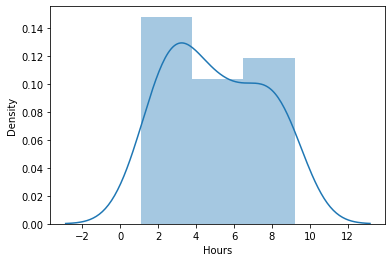

In [11]:
sns.distplot(hours)

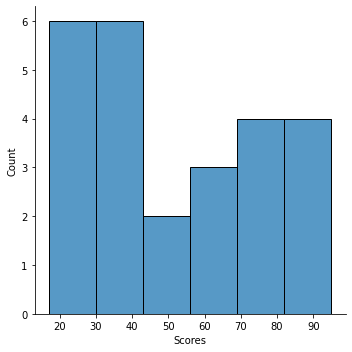

In [12]:
sns.displot(scores)

#### Linear Regression

In [17]:
X = data.iloc[:, :-1].values
y = data.iloc[:, :1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=50)

In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

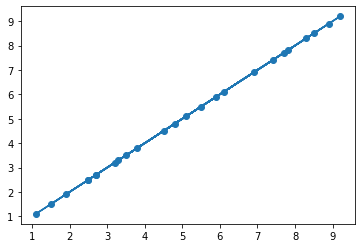

In [23]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X, line);
plt.show() 

In [24]:
y_pred=reg.predict(X_test)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


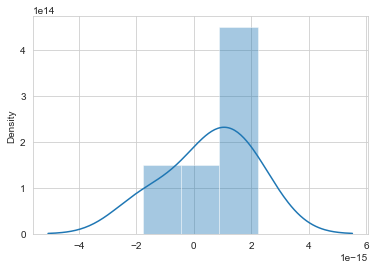

In [27]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

#### what would be the predicted score if a student studies for 9.25 hrs/day?

In [29]:
h=9.25
s=reg.predict([[h]])
print("If student studies for {} hours per day he / she will score{} % in exam.".format(h,s))

If student studies for 9.25 hours per day he / she will score[[9.25]] % in exam.


#### Model Evaluation

In [30]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute error:',metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absolute error: 1.2434497875801752e-15
R2 Score: 1.0
